<a href="https://colab.research.google.com/github/dhairyachandra/CSEE5590-Python-Deep-Learning-Programming/blob/master/DL_ICP6/Source/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 18us/step - loss: 0.5410 - accuracy: 0.4389 - val_loss: 0.4651 - val_accuracy: 0.4839
Epoch 2/5
60000/60000 [==============================] - 1s 16us/step - loss: 0.4173 - accuracy: 0.4888 - val_loss: 0.3928 - val_accuracy: 0.4882
Epoch 3/5
60000/60000 [==============================] - 1s 16us/step - loss: 0.3817 - accuracy: 0.4915 - val_loss: 0.3743 - val_accuracy: 0.4911
Epoch 4/5
60000/60000 [==============================] - 1s 16us/step - loss: 0.3649 - accuracy: 0.4949 - val_loss: 0.3590 - val_accuracy: 0.4950
Epoch 5/5
60000/60000 [==============================] - 1s 16us/step - loss: 0.3512 - accuracy: 0.4980 - val_loss: 0.3484 - val_accuracy: 0.4991
Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 1s 16us/step - loss: 0.3420 - accuracy: 0.4999 - val_loss: 0.3393 - val_accuracy: 0.4969
Epoch 2/25
60000/60000 

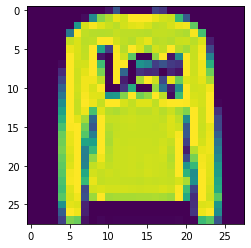

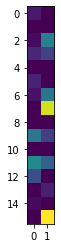

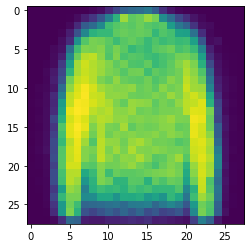

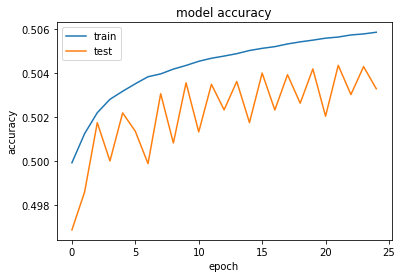

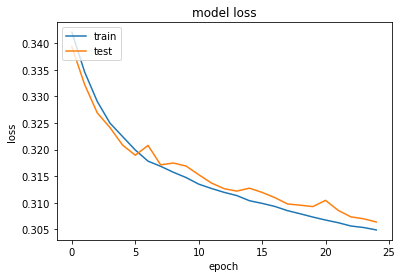

In [3]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
import numpy as np
from matplotlib import pyplot as plt

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

hidden_1 = Dense(32, activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(hidden_1)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

prediction = autoencoder.predict(x_test[1].reshape(1,784))

history = autoencoder.fit(x_train, x_train, batch_size=256, epochs=25, verbose=1,
                   validation_data=(x_test, x_test))


plt.imshow(x_test[1].reshape(28,28))
plt.show()

#bonus
plt.imshow(encoded_imgs[1].reshape(16,2))
plt.show()

plt.imshow(prediction.reshape(28,28))
plt.show()


# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()